In [3]:
import ipdb
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pylab as pylab
import cartopy
from utils import constants as cnst
from eod import msg
from utils import u_grid, u_interpolate as u_int, constants as cnst, u_arrays, u_darrays, u_met, u_statistics as u_stat
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as feature
import cartopy.io.shapereader as shapereader
import pandas as pd
import pickle as pkl
import glob
from utils import constants as cnst


coast = shapereader.natural_earth(resolution='110m',
                                  category='physical',
                                  name='coastline')

countries = shapereader.natural_earth(resolution='110m',
                                      category='cultural',
                                      name='admin_0_countries')

pylab.rcParams['figure.figsize'] = (50., 50.)
%matplotlib inline

In [2]:
cd ..

/home/ck/pythonWorkspace/proj_CEH


## Anomaly for single day in June vs daily climatology

In [77]:
path = cnst.network_data + 'data/OBS/AMSRE/aqua/nc_day/AMSR_L3_LPRMv05_A_*0605.nc'
files = glob.glob(path)

In [79]:
data = xr.open_mfdataset(files, autoclose=True).load()

In [80]:
data = data.sel(lon=slice(-10,10), lat=slice(9,20))

In [81]:
alls = data['SM'].values[np.isfinite(data['SM']).values].flatten()

In [83]:
valid_days = data['SM'].count(dim='time') 
mean =  data['SM'].mean(dim='time')
mean.values[valid_days.values<5] = np.nan

/home/ck/miniconda3/lib/python3.5/site-packages/xarray/core/nanops.py:162: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


In [84]:
ano  = data['SM']-mean

In [85]:
data['SM'].shape

(9, 44, 80)

In [88]:
hist_ano = ano.values[np.isfinite(ano.values)]

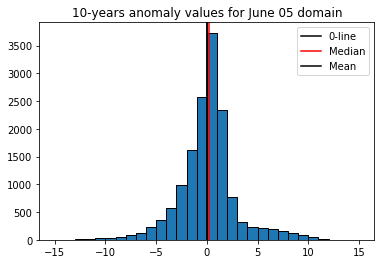

In [99]:
plt.hist(hist_ano, bins=30, range=(-15,15), edgecolor='k')
plt.axvline(x=0, color='k', label='0-line')
plt.axvline(x=np.median(hist_ano), color='r', label='Median')
plt.axvline(x=np.mean(hist_ano), color='k', label='Mean')
plt.title('10-years anomaly values for June 05 domain')
plt.legend()

## Entire SM anomaly dataset - anomaly based on monthly climatologies

In [4]:
path = cnst.network_data + 'data/OBS/AMSRE/aqua/sma_nc_day/sma_*.nc'
files = glob.glob(path)

In [5]:
data = xr.open_mfdataset(files, autoclose=True)
data = data.sel(lon=slice(-10,10), lat=slice(9,20))

In [6]:
data = data['SM'][(data['time.month']>=6) & (data['time.month']<=9)]

In [7]:
hist_ano = data.values[np.isfinite(data.values)]

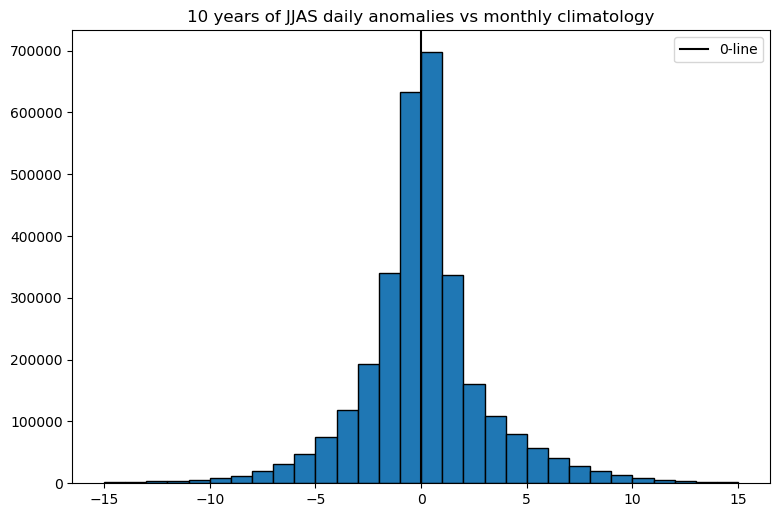

In [8]:
plt.figure(figsize=(9,6), dpi=100)
plt.hist(hist_ano, bins=30, range=(-15,15), edgecolor='k')
plt.axvline(x=0, color='k', label='0-line')
# plt.axvline(x=np.median(hist_ano), color='r', label='Median')
# plt.axvline(x=np.mean(hist_ano), color='k', label='Mean')
plt.title('10 years of JJAS daily anomalies vs monthly climatology')
plt.legend()

## Check latitudinal distribution of SM anomalies per month for full dataset

In [27]:
lat = data[data['time.month']==8].sel(lon=slice(-5,5)).mean(dim='lon')

/home/ck/miniconda3/lib/python3.5/site-packages/dask/array/numpy_compat.py:28: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


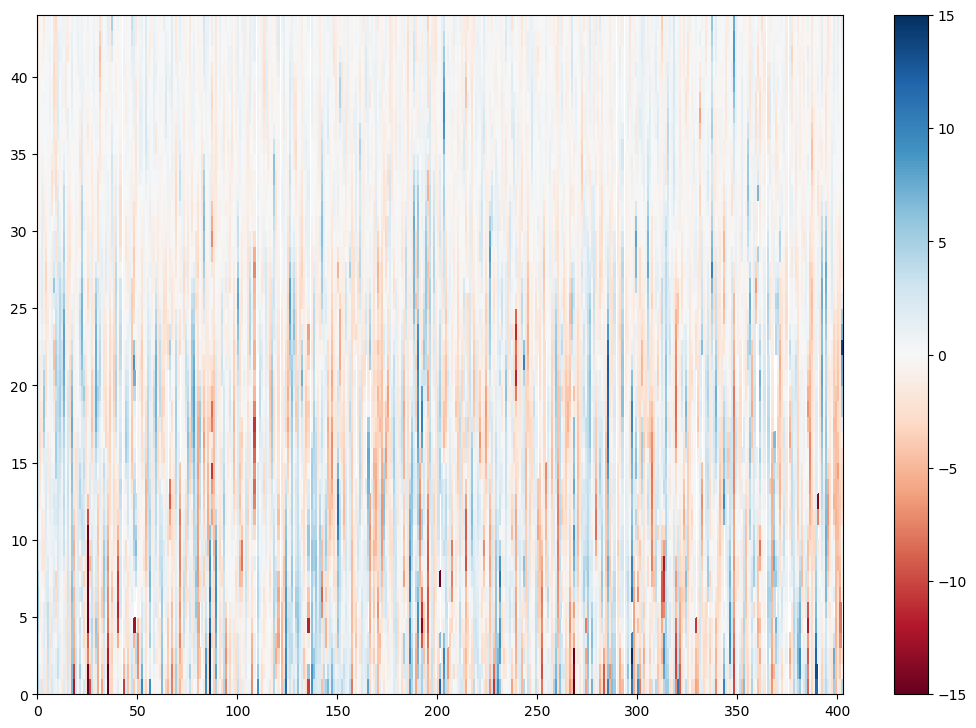

In [28]:
plt.figure(figsize=(13,9), dpi=100)
plt.pcolormesh(lat.T, cmap='RdBu', vmin=-15, vmax=15)
plt.colorbar()

/home/ck/miniconda3/lib/python3.5/site-packages/dask/array/numpy_compat.py:28: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


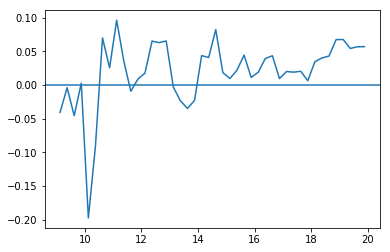

In [29]:
plt.plot(lat.lat, lat.mean(dim='time'))
plt.axhline(y=0)

## Core-associated SM anomaly distribution - random sampling on core days

In [30]:
path = cnst.network_data + 'figs/LSTA/corrected_LSTA/new/wavelet_coefficients'
dic = pkl.load(open(path+"/LSTA_histograms_AMSRE_17_corrected_SouthBox.p", "rb"))
for k in dic.keys():
    coll = []
    for ll in dic[k]:
        coll.extend(ll)
    dic[k] = coll
print(dic.keys())

cinput = np.array(dic['c30'])
rinput = np.array(dic['r30'])

cinput = cinput[np.isfinite(cinput)]
rinput = rinput[np.isfinite(rinput)]

dict_keys(['e100', 's100', 're100', 'rs100', 'c30', 'r30'])


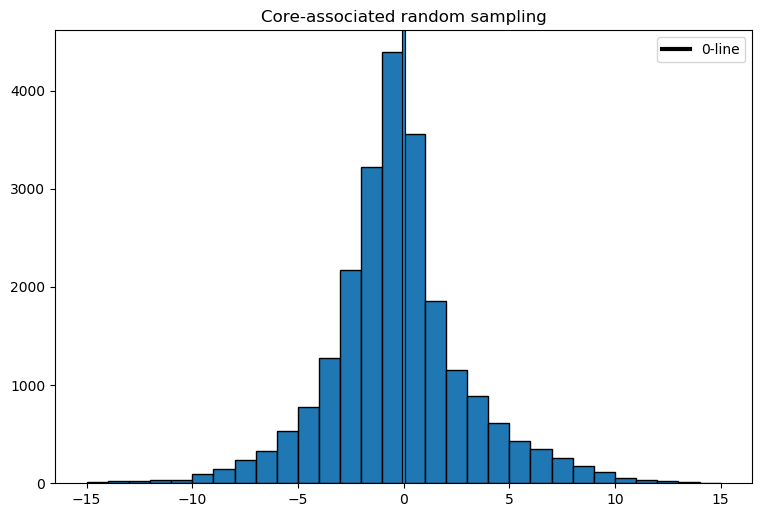

In [31]:
plt.figure(figsize=(9,6), dpi=100)
plt.hist(rinput, range=(-15,15), bins=30, edgecolor='k')
plt.axvline(x=0, color='k', label='0-line', linewidth=3)
plt.axvline(0)
plt.title('Core-associated random sampling')
plt.legend()

## Cumulative distribution function of SM anomaly: Full distribution vs Random sample

Full distribution has fewer 'medium strength' dry pixels and more low-value wet cases

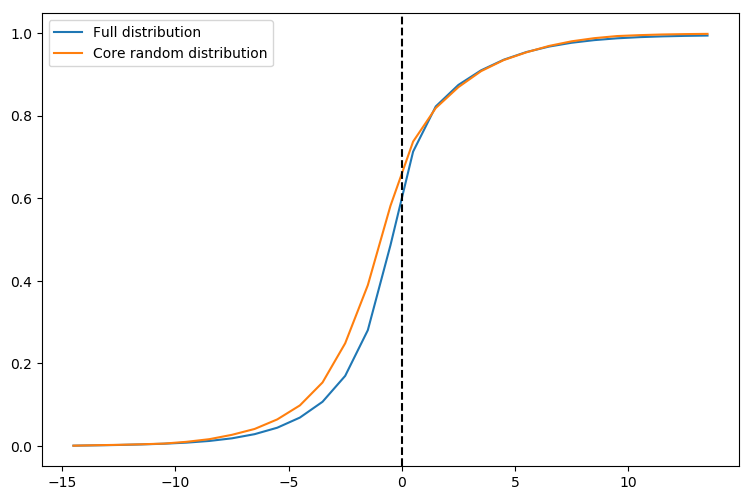

In [126]:
nbrand, randcount, bins = u_stat.histo_frequency(rinput, bins=np.arange(-15,15,1))
nball, allcount, bins = u_stat.histo_frequency(hist_ano, bins=np.arange(-15, 15, 1))

bin_centre = bins[0:-1] + ((bins[1::] - bins[0:-1]) / 2)
cumulative_all = np.cumsum(nball)
cumulative_random = np.cumsum(nbrand)

plt.figure(figsize=(9,6), dpi=100)
plt.plot(bin_centre,cumulative_all, label='Full distribution')
plt.plot(bin_centre, cumulative_random, label='Core random distribution')
plt.axvline(0,ymin=0, ymax=1, linestyle='dashed', color='k')
plt.legend()